<a href="https://colab.research.google.com/github/kghhhhui/baby_unbalanced/blob/main/02_audiomentations_baby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.1 MB/s eta 0:00:00


In [2]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import IPython.display as ipd
import soundfile as sf

In [3]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#1) 파일 한 개를 예제로 진행해보자.
#오디오 변형 포함한 파이프라인 생성
#가우시안 노이즈 추가, 시간 스트레칭, 피치 쉬프트, 오디오 시프트 변형
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
])

# 음성 파일 한 개를 예시로 넣어보자.
audio_file_path = '/content/drive/MyDrive/baby/baby-data-main/sample/awake/510.wav'
samples, sample_rate = sf.read(audio_file_path)

#파이프라인을 적용하여 오디오 데이터를 변형
augmented_samples = augment(samples=samples, sample_rate=sample_rate)

/usr/local/lib/python3.10/dist-packages/audiomentations/core/transforms_interface.py:61: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(


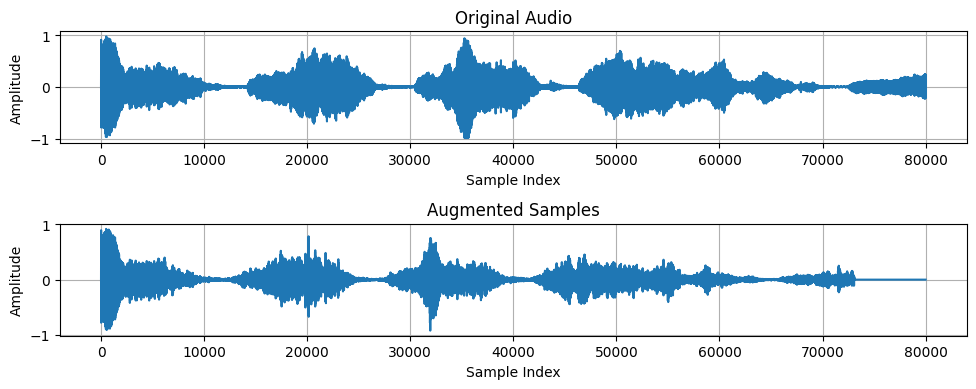

In [9]:
#그래프와 오디오로 표현

# Plot the original samples
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.title("Original Audio")
plt.plot(samples)  # Assuming 'samples' is the audio data
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

ipd.display(Audio(samples, rate=16000, normalize=False, autoplay=False))


# Plot the augmented samples
plt.subplot(2, 1, 2)
plt.title("Augmented Samples")
plt.plot(augmented_samples)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

ipd.display(Audio(augmented_samples, rate=16000, normalize=False, autoplay=False))

plt.tight_layout()
plt.show()

##기존의 예시 그대로 가우시안 노이즈 추가, 시간 스트레칭, 피치 쉬프트, 오디오 시프트 변형 모두 사용
->현재 데이터는 'awake' 데이터이나, 파형등의 변화로 'awake'가 아닌 'hungry'등 다른 데이터로 읽을 수 있음
####-> 파형에 영향을 미치지 않는 Transforms 추가만 사용하는 건 어떨까?
: Resample, Normalize, ClippingDistortion, PolynomialFitting(없음), Noop(아무런 변화도 가하지 않음)

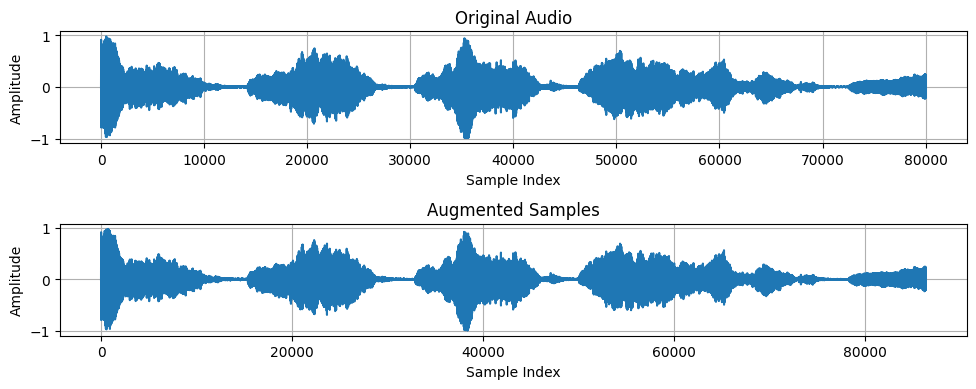

In [12]:
# 01) resample : 오디오 샘플의 재샘플링을 수행
from audiomentations import Compose, Resample

# Define the audiomentations pipeline with non-waveform-affecting transformations
augment1 = Compose([
    Resample(p=1.0),  # Apply Resample transformation with probability 1.0 (always)
])

# 음성 파일 한 개를 예시로 넣어보자.
audio_file_path = '/content/drive/MyDrive/baby/baby-data-main/sample/awake/510.wav'
samples, sample_rate = sf.read(audio_file_path)

#파이프라인을 적용하여 오디오 데이터를 변형
augmented_samples = augment1(samples=samples, sample_rate=sample_rate)

#그래프와 오디오로 표현

# Plot the original samples
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.title("Original Audio")
plt.plot(samples)  # Assuming 'samples' is the audio data
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

ipd.display(Audio(samples, rate=16000, autoplay=False))


# Plot the augmented samples
plt.subplot(2, 1, 2)
plt.title("Augmented Samples")
plt.plot(augmented_samples)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

ipd.display(Audio(augmented_samples, rate=16000, normalize=False, autoplay=False))

plt.tight_layout()
plt.show()

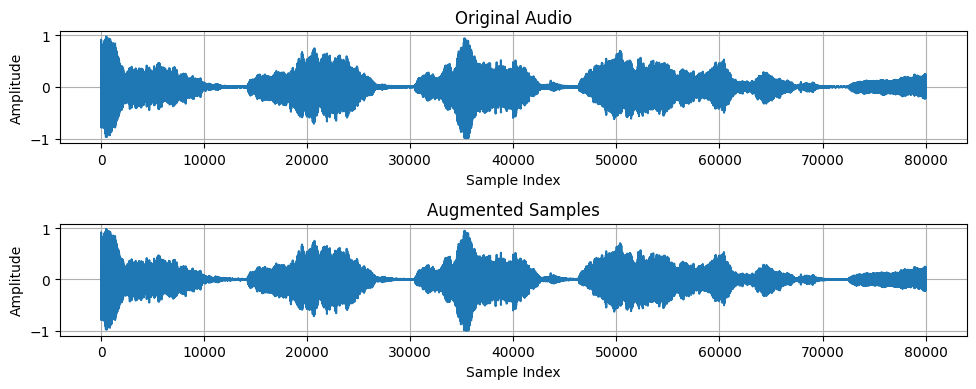

In [13]:
# 02) Normalize : 오디오 크기를 정규화하여 진폭을 조정
from audiomentations import Compose, Normalize

# Define the audiomentations pipeline with non-waveform-affecting transformations
augment2 = Compose([
    Normalize(p=1.0),  # Apply Normalize transformation with probability 1.0 (always)
])

# 음성 파일 한 개를 예시로 넣어보자.
audio_file_path = '/content/drive/MyDrive/baby/baby-data-main/sample/awake/510.wav'
samples, sample_rate = sf.read(audio_file_path)

#파이프라인을 적용하여 오디오 데이터를 변형
augmented_samples = augment2(samples=samples, sample_rate=sample_rate)

#그래프와 오디오로 표현

# Plot the original samples
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.title("Original Audio")
plt.plot(samples)  # Assuming 'samples' is the audio data
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

ipd.display(Audio(samples, rate=16000, normalize=False, autoplay=False))


# Plot the augmented samples
plt.subplot(2, 1, 2)
plt.title("Augmented Samples")
plt.plot(augmented_samples)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

ipd.display(Audio(augmented_samples, rate=16000, normalize=False, autoplay=False))

plt.tight_layout()
plt.show()

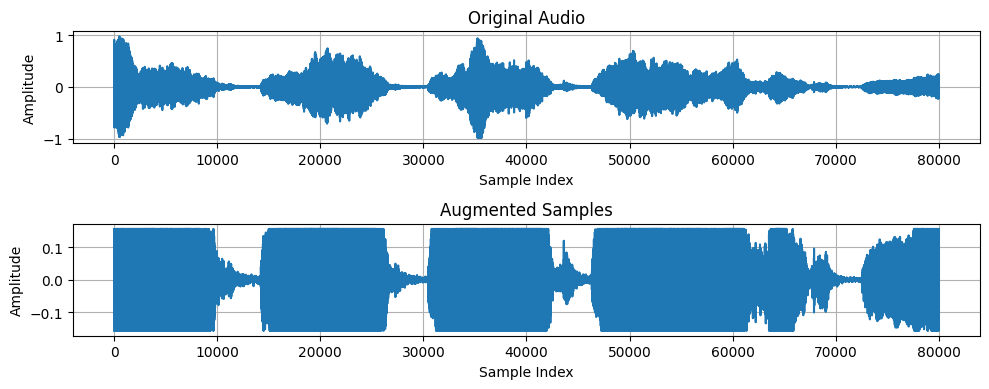

In [14]:
# 03) ClippingDistortion : 오디오 클리핑을 적용하여 왜곡을 생성
from audiomentations import Compose, ClippingDistortion

# Define the audiomentations pipeline with non-waveform-affecting transformations
augment3 = Compose([
    ClippingDistortion(p=1.0),  # Apply Normalize transformation with probability 1.0 (always)
])

# 음성 파일 한 개를 예시로 넣어보자.
audio_file_path = '/content/drive/MyDrive/baby/baby-data-main/sample/awake/510.wav'
samples, sample_rate = sf.read(audio_file_path)

#파이프라인을 적용하여 오디오 데이터를 변형
augmented_samples = augment3(samples=samples, sample_rate=sample_rate)

#그래프와 오디오로 표현

# Plot the original samples
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.title("Original Audio")
plt.plot(samples)  # Assuming 'samples' is the audio data
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

ipd.display(Audio(samples, rate=16000, normalize=False, autoplay=False))


# Plot the augmented samples
plt.subplot(2, 1, 2)
plt.title("Augmented Samples")
plt.plot(augmented_samples)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

ipd.display(Audio(augmented_samples, rate=16000, normalize=False, autoplay=False))

plt.tight_layout()
plt.show()

##디렉토리 통째로 변환하기
-> 디렉토리 안의 파일을 모두 변환해 보자

In [16]:
# 실행도중 오류발생 -> 오류 발생한 파일은 넘어가고 진행하기
# 근데 새로 생성한 디렉토리 파일 개수가 100개라서 아까 발생한 오류는 뭐였나 싶어서 당황

import os
import soundfile as sf
from audiomentations import Compose, Normalize

# Define the audiomentations pipeline with non-waveform-affecting transformations
augment2 = Compose([
    Normalize(p=1.0),  # Apply Normalize transformation with probability 1.0 (always)
])

# Specify the directory containing audio files
audio_dir = '/content/drive/MyDrive/baby/baby-data-main/sample/awake/'

# Get a list of all audio files in the directory
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]

# Create the augmented subdirectory if it doesn't exist
augmented_dir = os.path.join(audio_dir, 'augmented')
os.makedirs(augmented_dir, exist_ok=True)

# Loop through each audio file and apply the augmentation
for audio_file in audio_files:
    audio_file_path = os.path.join(audio_dir, audio_file)
    try:
        samples, sample_rate = sf.read(audio_file_path)

        # Apply the augmentation
        augmented_samples = augment2(samples=samples, sample_rate=sample_rate)

        # Save the augmented audio back to the augmented subdirectory
        augmented_file_path = os.path.join(augmented_dir, audio_file)
        sf.write(augmented_file_path, augmented_samples, sample_rate)

        print(f"Augmentation complete for {audio_file}")
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")

print("Augmentation process complete.")


Augmentation complete for awake_124.wav
Augmentation complete for 525.wav
Augmentation complete for 671.wav
Augmentation complete for awake_159.wav
Augmentation complete for 631.wav
Augmentation complete for 740.wav
Augmentation complete for awake_68.wav
Augmentation complete for 569.wav
Augmentation complete for 742.wav
Augmentation complete for awake_8.wav
Augmentation complete for 794.wav
Augmentation complete for awake_44.wav
Augmentation complete for awake_129.wav
Augmentation complete for 710.wav
Augmentation complete for 510.wav
Augmentation complete for 594.wav
Augmentation complete for 539.wav
Augmentation complete for awake_1.wav
Augmentation complete for awake_104.wav
Augmentation complete for 616.wav
Augmentation complete for awake_121.wav
Augmentation complete for awake_105.wav
Augmentation complete for 597.wav
Augmentation complete for awake_89.wav
Augmentation complete for 816.wav
Augmentation complete for awake_143.wav
Augmentation complete for awake_111.wav
Augmentatio

In [17]:
# 어제 오류 난 uncomfortable로 한 번 더 해보자.
#97개 모두 저장 완료.
augment2 = Compose([
    Normalize(p=1.0),  # Apply Normalize transformation with probability 1.0 (always)
])

# Specify the directory containing audio files
audio_dir = '/content/drive/MyDrive/baby/baby-data-main/sample/uncomfortable'

# Get a list of all audio files in the directory
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]

# Create the augmented subdirectory if it doesn't exist
augmented_dir = os.path.join(audio_dir, 'augmented')
os.makedirs(augmented_dir, exist_ok=True)

# Loop through each audio file and apply the augmentation
for audio_file in audio_files:
    audio_file_path = os.path.join(audio_dir, audio_file)
    try:
        samples, sample_rate = sf.read(audio_file_path)

        # Apply the augmentation
        augmented_samples = augment2(samples=samples, sample_rate=sample_rate)

        # Save the augmented audio back to the augmented subdirectory
        augmented_file_path = os.path.join(augmented_dir, audio_file)
        sf.write(augmented_file_path, augmented_samples, sample_rate)

        print(f"Augmentation complete for {audio_file}")
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")

print("Augmentation process complete.")


Augmentation complete for uncomfortable_5.wav
Augmentation complete for 572.wav
Augmentation complete for 347.wav
Augmentation complete for uncomfortable_22.wav
Augmentation complete for uncomfortable_8.wav
Augmentation complete for 555.wav
Augmentation complete for uncomfortable_142.wav
Augmentation complete for uncomfortable_119.wav
Augmentation complete for uncomfortable_11.wav
Augmentation complete for uncomfortable_54.wav
Augmentation complete for uncomfortable_87.wav
Augmentation complete for uncomfortable_149.wav
Augmentation complete for uncomfortable_156.wav
Augmentation complete for 482.wav
Augmentation complete for 598.wav
Augmentation complete for 459.wav
Augmentation complete for uncomfortable_56.wav
Augmentation complete for uncomfortable_94.wav
Augmentation complete for uncomfortable_115.wav
Augmentation complete for 251.wav
Augmentation complete for uncomfortable_35.wav
Augmentation complete for 501.wav
Augmentation complete for uncomfortable_17.wav
Augmentation complet

###오류 대잔치

In [ ]:
# 1. 디렉토리 안의 파일 전부 변환
##오류 발생!
import os
import soundfile as sf
from audiomentations import Normalize

# Define the audiomentations pipeline
augments = Compose([
    Normalize(p=1.0),
])

# Specify the directory containing audio files
input_directory = '/content/drive/MyDrive/baby/baby-data-main/sample/sleepy'

# Specify the output directory to save augmented files
output_directory = '/content/drive/MyDrive/baby/baby-data-main/sample/sleepy2'

# List all files in the input directory
file_list = os.listdir(input_directory)

# Loop through each file and apply the augmentation pipeline
for file_name in file_list:
    if file_name.endswith('.wav'):
        # Load the audio file
        file_path = os.path.join(input_directory, file_name)
        samples, sample_rate = sf.read(file_path)

        # Apply the defined pipeline to the loaded audio samples
        augmented_samples = augments(samples=samples, sample_rate=sample_rate)

        # Save the augmented audio to the output directory
        output_path = os.path.join(output_directory, f"augmented_{file_name}")
        sf.write(output_path, augmented_samples, sample_rate)



LibsndfileError: ignored

In [ ]:
# 2. 오류난 파일은 넘어가고 진행
import os
import soundfile as sf
from audiomentations import Compose, Normalize

# Define the audiomentations pipeline
augments = Compose([
    Normalize(p=1.0),
])

# Specify the directory containing audio files
input_directory = '/content/drive/MyDrive/baby/baby-data-main/sample/sleepy'

# Specify the output directory to save augmented files
output_directory = '/content/drive/MyDrive/baby/baby-data-main/sample/sleepy2'

# List all files in the input directory
file_list = os.listdir(input_directory)

# Loop through each file and apply the augmentation pipeline
for file_name in file_list:
    if file_name.endswith('.wav'):
        try:
            # Load the audio file
            file_path = os.path.join(input_directory, file_name)
            samples, sample_rate = sf.read(file_path)

            # Apply the defined pipeline to the loaded audio samples
            augmented_samples = augments(samples=samples, sample_rate=sample_rate)

            # Save the augmented audio to the output directory
            output_path = os.path.join(output_directory, f"augmented_{file_name}")
            sf.write(output_path, augmented_samples, sample_rate)

            print(f"Augmented and saved: {output_path}")
        except Exception as e:
            print(f"Error processing {file_name}: {str(e)}")
            continue


Error processing sleepy_51.wav: Error opening '/content/drive/MyDrive/baby/baby-data-main/sample/sleepy2/augmented_sleepy_51.wav': System error.
Error processing 736.wav: Error opening '/content/drive/MyDrive/baby/baby-data-main/sample/sleepy2/augmented_736.wav': System error.
Error processing 896.wav: Error opening '/content/drive/MyDrive/baby/baby-data-main/sample/sleepy2/augmented_896.wav': System error.
Error processing 781.wav: Error opening '/content/drive/MyDrive/baby/baby-data-main/sample/sleepy2/augmented_781.wav': System error.
Error processing sleepy_6.wav: Error opening '/content/drive/MyDrive/baby/baby-data-main/sample/sleepy2/augmented_sleepy_6.wav': System error.
Error processing 825.wav: Error opening '/content/drive/MyDrive/baby/baby-data-main/sample/sleepy2/augmented_825.wav': System error.
Error processing 893.wav: Error opening '/content/drive/MyDrive/baby/baby-data-main/sample/sleepy2/augmented_893.wav': System error.
Error processing sleepy_82.wav: Error opening '

In [ ]:
#3. 파일이 없음...! -> 오류 수정 필요
import os

# Specify the output directory
output_directory = '/content/drive/MyDrive/baby/baby-data-main/sample/sleepy2'

# List all files in the output directory
output_files = os.listdir(output_directory)

# Print the list of output files
for output_file in output_files:
    print(output_file)

# Example: Play the first output audio file
if output_files:
    first_output_file = os.path.join(output_directory, output_files[0])
    os.system(f"aplay {first_output_file}")  # Use appropriate player for your system


FileNotFoundError: ignored